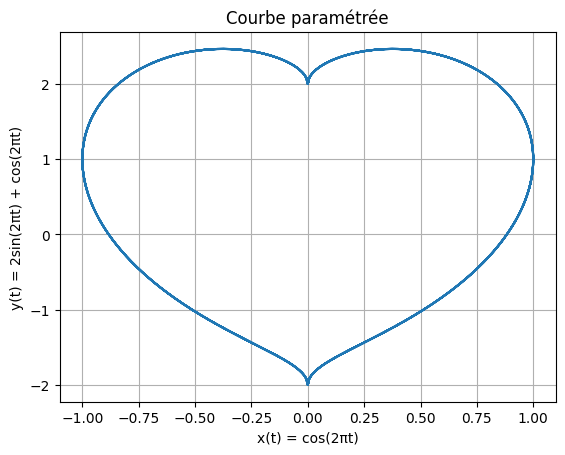

DFT-1(F) = f(t) ?  True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 5, 0.001)
x_t = np.cos(2 * np.pi * t)
y_t = 2 * np.sin(2 * np.pi * t) + np.sqrt(np.abs(np.cos(2 * np.pi * t)))  # Racine carrée de cos

plt.figure()
plt.plot(x_t, y_t)
plt.title('Courbe paramétrée')
plt.xlabel('x(t) = cos(2πt)')
plt.ylabel('y(t) = 2sin(2πt) + cos(2πt)')
plt.grid(True)
plt.show()

f_t = x_t + 1j * y_t
F = np.fft.fft(f_t)

f_t_inv = np.fft.ifft(F)

is_equal = np.allclose(f_t, f_t_inv)
print("DFT-1(F) = f(t) ? ", is_equal)

if not is_equal:
    print("Les signaux sont légèrement différents (erreur numérique).")




[-1.92694118e-14-6.02592073e-01j -7.63476234e-08-1.70589512e-08j
 -1.47880920e-08+1.11799181e-08j ...  3.16408226e-08+4.36381317e-09j
  1.47880813e-08+1.11798946e-08j  7.63476022e-08-1.70589221e-08j]


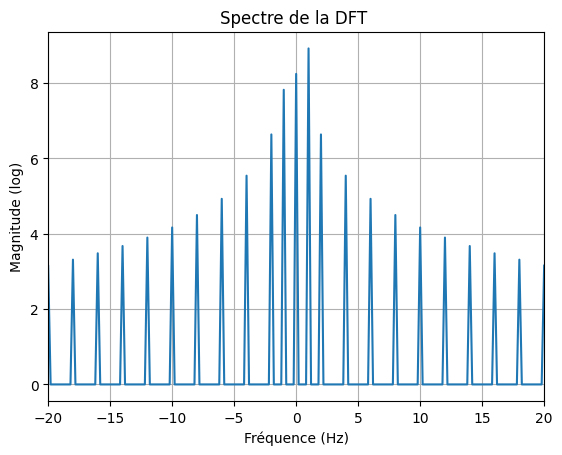

In [ ]:
F_shifted = np.fft.fftshift(F)
print(F_shifted)
frequencies = np.fft.fftshift(np.fft.fftfreq(len(f_t), d=(t[1] - t[0])))

magnitude_spectrum = np.abs(F_shifted)
log_magnitude_spectrum = np.log(magnitude_spectrum + 1)

plt.figure()
plt.plot(frequencies, log_magnitude_spectrum)
plt.title('Spectre de la DFT ')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Magnitude (log)')
plt.grid(True)
plt.xlim([-20, 20])
plt.show()


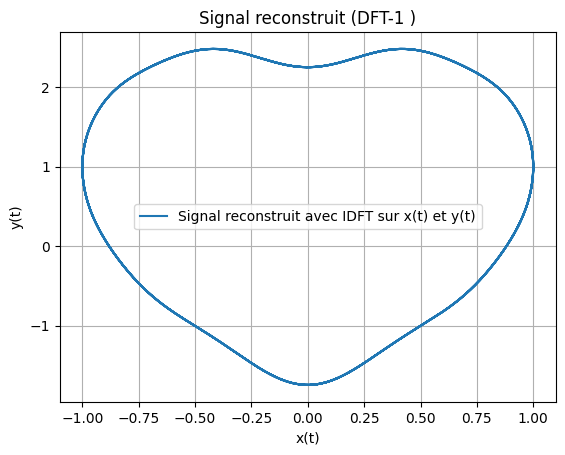

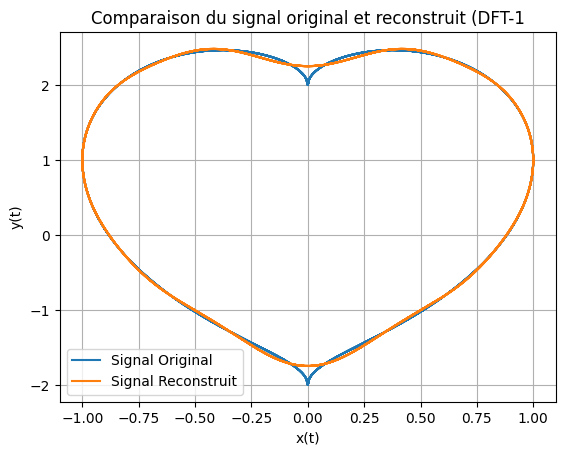

In [ ]:
num_frequencies_to_keep = 50
F_filtered = F.copy()
F_filtered[num_frequencies_to_keep:-num_frequencies_to_keep] = 0  # Filtrage par tranche de fréquences

f_t_inv_filtered = np.fft.ifft(F_filtered)

X = np.fft.fft(x_t)
Y = np.fft.fft(y_t)

X_filtered = X.copy()
Y_filtered = Y.copy()

X_filtered[num_frequencies_to_keep:-num_frequencies_to_keep] = 0
Y_filtered[num_frequencies_to_keep:-num_frequencies_to_keep] = 0


x_t_inv = np.fft.ifft(X_filtered)
y_t_inv = np.fft.ifft(Y_filtered)

plt.figure()
plt.plot(np.real(x_t_inv), np.real(y_t_inv), label='Signal reconstruit avec IDFT sur x(t) et y(t)')
plt.title('Signal reconstruit (DFT-1 )')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(x_t, y_t, label='Signal Original')
plt.plot(np.real(x_t_inv), np.real(y_t_inv), label='Signal Reconstruit')
plt.title('Comparaison du signal original et reconstruit (DFT-1')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.show()


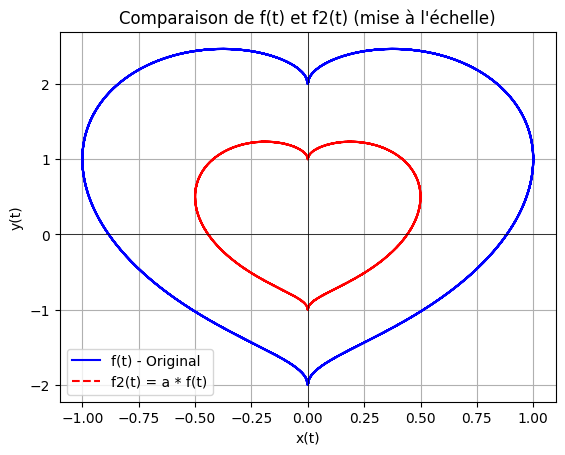

In [ ]:
a = 0.5

x_t_2 = a * x_t
y_t_2 = a * y_t

plt.figure()
plt.plot(x_t, y_t, label='f(t) - Original', color='blue')
plt.plot(x_t_2, y_t_2, label='f2(t) = a * f(t)', color='red', linestyle='--')
plt.title('Comparaison de f(t) et f2(t) (mise à l\'échelle)')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()


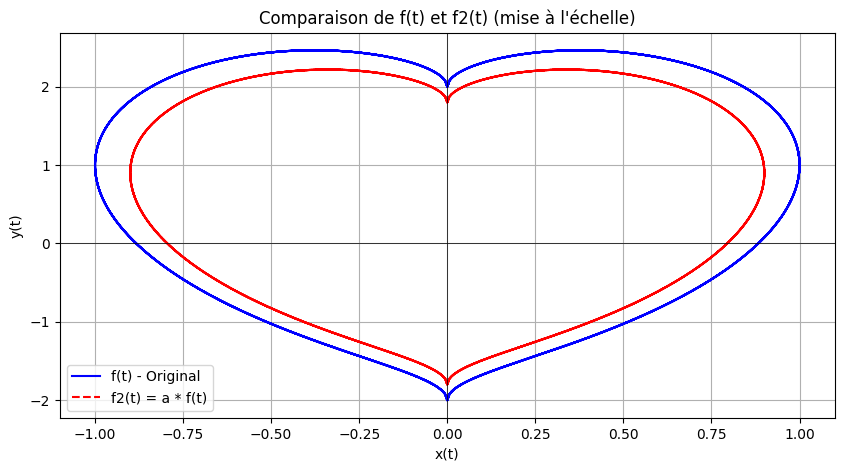

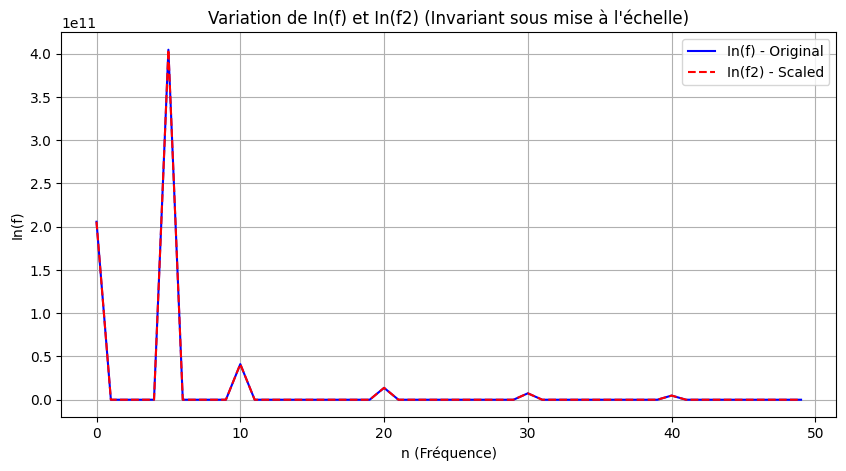

In [ ]:
a = 0.9

x_t_2 = a * x_t
y_t_2 = a * y_t

f_t_2 = x_t_2 + 1j * y_t_2

F_original = np.fft.fft(f_t)
F_scaled = np.fft.fft(f_t_2)

In_f_original = np.abs(F_original) / np.abs(F_original[2])
In_f_scaled = np.abs(F_scaled) / np.abs(F_scaled[2])

plt.figure(figsize=(10, 5))
plt.plot(x_t, y_t, label='f(t) - Original', color='blue')
plt.plot(x_t_2, y_t_2, label='f2(t) = a * f(t)', color='red', linestyle='--')
plt.title("Comparaison de f(t) et f2(t) (mise à l'échelle)")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.show()

num_frequencies_to_display = 50
plt.figure(figsize=(10, 5))
plt.plot(range(num_frequencies_to_display), In_f_original[:num_frequencies_to_display], label="In(f) - Original", color="blue")
plt.plot(range(num_frequencies_to_display), In_f_scaled[:num_frequencies_to_display], label="In(f2) - Scaled", color="red", linestyle="--")
plt.title("Variation de In(f) et In(f2) (Invariant sous mise à l'échelle)")
plt.xlabel("n (Fréquence)")
plt.ylabel("In(f)")
plt.legend()
plt.grid(True)
plt.show()


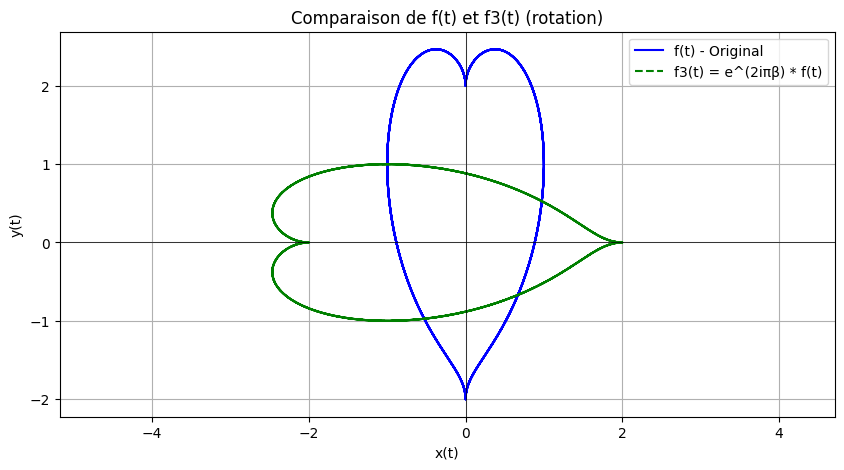

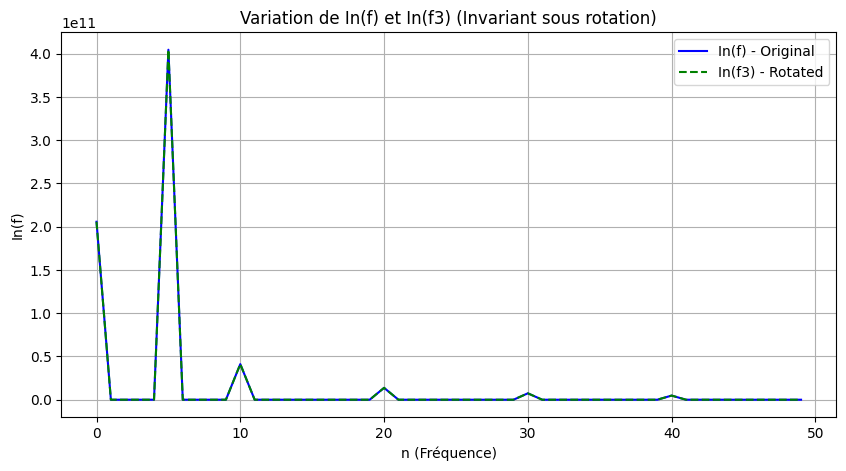

In [ ]:
# Rotation parameter
beta = 0.25

rotation_factor = np.exp(2j * np.pi * beta)
f_t_3 = rotation_factor * f_t

F_rotated = np.fft.fft(f_t_3)

In_f_original = np.abs(F_original) / np.abs(F_original[2])
In_f_rotated = np.abs(F_rotated) / np.abs(F_rotated[2])

plt.figure(figsize=(10, 5))
plt.plot(np.real(f_t), np.imag(f_t), label='f(t) - Original', color='blue')
plt.plot(np.real(f_t_3), np.imag(f_t_3), label='f3(t) = e^(2iπβ) * f(t)', color='green', linestyle='--')
plt.title("Comparaison de f(t) et f3(t) (rotation)")
plt.axis("equal")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.show()

# Plotting the variation of In(f) and In(f3) descriptors to observe invariance
num_frequencies_to_display = 50
plt.figure(figsize=(10, 5))
plt.plot(range(num_frequencies_to_display), In_f_original[:num_frequencies_to_display], label="In(f) - Original", color="blue")
plt.plot(range(num_frequencies_to_display), In_f_rotated[:num_frequencies_to_display], label="In(f3) - Rotated", color="green", linestyle="--")

plt.title("Variation de In(f) et In(f3) (Invariant sous rotation)")
plt.xlabel("n (Fréquence)")
plt.ylabel("In(f)")
plt.legend()
plt.grid(True)
plt.show()


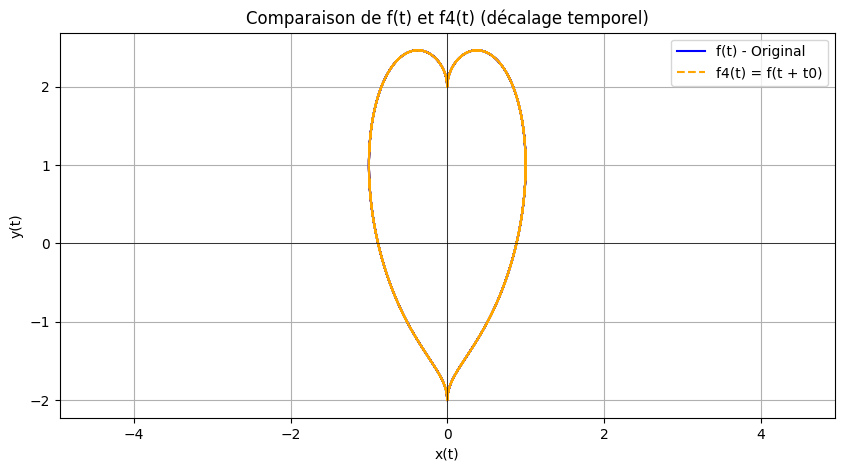

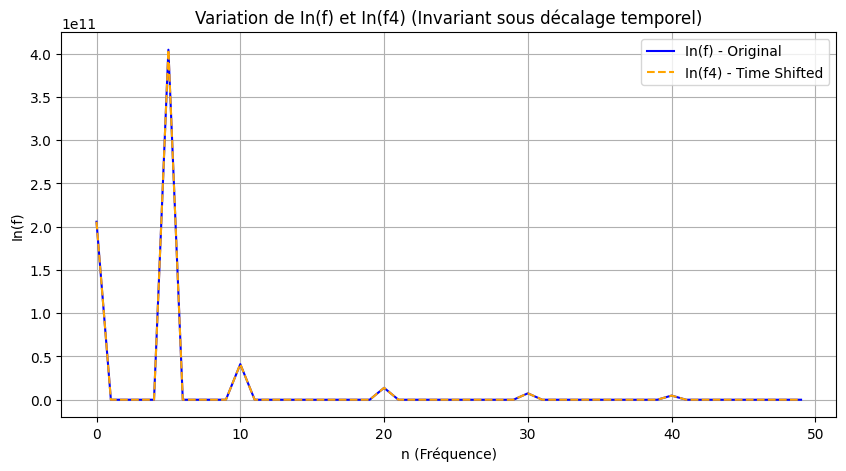

In [ ]:
t_0 = 1.0

f_t_4 = np.roll(f_t, int(t_0 / (t[1] - t[0])))
F_shifted = np.fft.fft(f_t_4)

In_f_original = np.abs(F_original) / np.abs(F_original[2])
In_f_shifted = np.abs(F_shifted) / np.abs(F_shifted[2])

plt.figure(figsize=(10, 5))
plt.plot(np.real(f_t), np.imag(f_t), label='f(t) - Original', color='blue')
plt.plot(np.real(f_t_4), np.imag(f_t_4), label='f4(t) = f(t + t0)', color='orange', linestyle='--')
plt.title("Comparaison de f(t) et f4(t) (décalage temporel)")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.axis("equal")
plt.show()

num_frequencies_to_display = 50
plt.figure(figsize=(10, 5))
plt.plot(range(num_frequencies_to_display), In_f_original[:num_frequencies_to_display], label="In(f) - Original", color="blue")
plt.plot(range(num_frequencies_to_display), In_f_shifted[:num_frequencies_to_display], label="In(f4) - Time Shifted", color="orange", linestyle="--")
plt.title("Variation de In(f) et In(f4) (Invariant sous décalage temporel)")
plt.xlabel("n (Fréquence)")
plt.ylabel("In(f)")
plt.legend()
plt.grid(True)
plt.show()


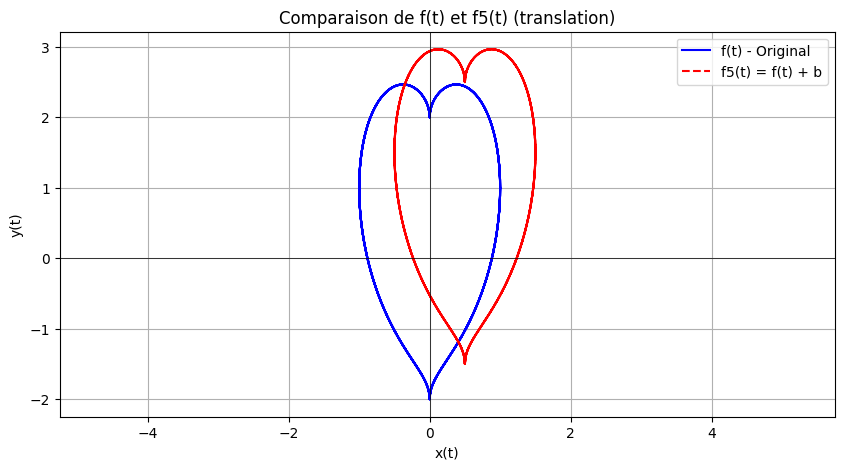

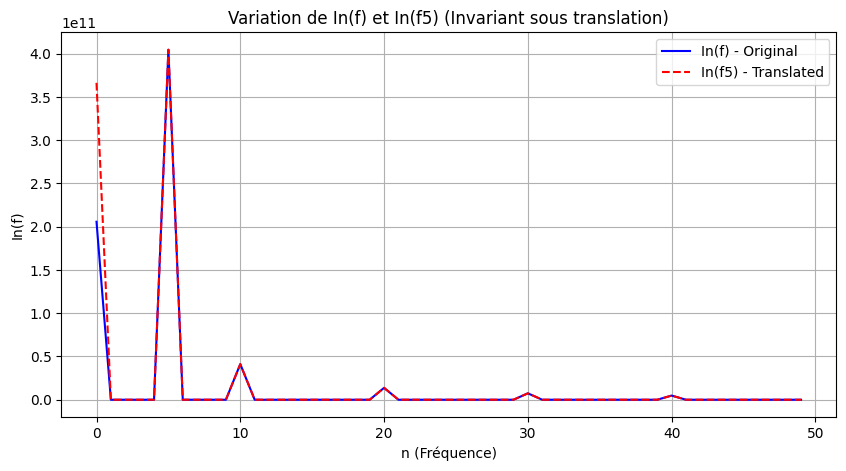

In [ ]:
b = 0.5 + 0.5j
f_t_5 = f_t + b

F_translated = np.fft.fft(f_t_5)

In_f_original = np.abs(F_original) / np.abs(F_original[2])
In_f_translated = np.abs(F_translated) / np.abs(F_translated[2])

plt.figure(figsize=(10, 5))
plt.plot(np.real(f_t), np.imag(f_t), label='f(t) - Original', color='blue')
plt.plot(np.real(f_t_5), np.imag(f_t_5), label='f5(t) = f(t) + b', color='red', linestyle='--')
plt.title("Comparaison de f(t) et f5(t) (translation)")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.axis("equal")  # Ensures equal scaling
plt.show()

num_frequencies_to_display = 50
plt.figure(figsize=(10, 5))
plt.plot(range(num_frequencies_to_display), In_f_original[:num_frequencies_to_display], label="In(f) - Original", color="blue")
plt.plot(range(num_frequencies_to_display), In_f_translated[:num_frequencies_to_display], label="In(f5) - Translated", color="red", linestyle="--")
plt.title("Variation de In(f) et In(f5) (Invariant sous translation)")
plt.xlabel("n (Fréquence)")
plt.ylabel("In(f)")
plt.legend()
plt.grid(True)
plt.show()


**La translation d'un signal modifie son centre de masse ce qui change l'invariance des descripteurs de Fourier (premier composante ) et les composants de fréquence supérieure conservent la forme du signal.**





